## Figure 3: In-depth characterization of BAL monocyte-like macrophages in various ILD subtypes

In [1]:
library(Seurat)          
library(ggplot2)       
library(dplyr)       
library(tidyr)          
library(patchwork)       
library(Matrix)         
library(ComplexHeatmap) 
library(slingshot)      
library(msigdbr)       
library(fgsea)
library(cowplot)        
library(scales)        
library(speckle)    
set.seed(1) 

options(repr.plot.width = 25, repr.plot.height = 15)
options(ggrepel.max.overlaps = Inf)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching pa

In [2]:
# Load Seurat Object
bal <- readRDS("BAL_FINAL.rds")

An object of class Seurat 
69485 features across 17751 samples within 2 assays 
Active assay: SCT (30893 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, scVI, umap

PC_ 1 
Positive:  FABP4, LSAMP, CCL5, IL32, SKAP1, THEMIS, CCL18, APOC1, LINC02694, CD2 
	   C1QB, FTL, C1QA, CD96, LINC03051, CD52, IFI27, SYNE2, GZMA, LTB 
	   RORA, BCL11B, NUPR1, INPP4B, CD3D, CAMK4, LINC01934, TRAC, GCHFR, CD3G 
Negative:  CCL2, SPP1, CXCL10, CCL3, PID1, C15orf48, EMP1, VCAN, EREG, IER3 
	   FOS, CXCL9, SLC8A1, DOCK4, IL1B, ALCAM, MARCKS, CXCL8, FMN1, TMEM163 
	   SPRED1, SOD2, SGK1, NAMPT, CLEC5A, FPR3, PLXDC2, GPR183, CCL4L2, TIMP1 
PC_ 2 
Positive:  CCL2, CXCL10, SPP1, CXCL9, APOE, CCL3, CCL18, CXCL11, CCL4, FTL 
	   C15orf48, CCL8, IFI27, MARCKS, CCL13, CHI3L1, GBP1, APOC1, CCL4L2, CTSL 
	   FTH1, LGMN, MMP9, SOD2, CALHM6, GBP5, CCL7, CHIT1, VAMP5, C1QB 
Negative:  VCAN, PID1, PLXDC2, SLC8A1, DPYD, SPRED1, ALCAM, HDAC9, ENSG00000226281, NEAT1 
	   TRPS1, GPCPD1, MOB3B, ARHGAP26, GNAQ, FOS, ZEB2, LRMDA, EREG, MEF2A 
	   ADK, CAMK1D, MRC1, FN1, TMEM163, PPARG, MIR23AHG, TMTC2, ZSWIM6, STAC 
PC_ 3 
Positive:  SPP1, CCL2, EMP1, SDC2, MMP9, CHI3L1, CHIT1, RNASE1, M

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17751
Number of edges: 607516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9089
Number of communities: 6
Elapsed time: 2 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:08:37 UMAP embedding parameters a = 0.9922 b = 1.112

12:08:37 Read 17751 rows and found 30 numeric columns

12:08:37 Using Annoy for neighbor search, n_neighbors = 30

12:08:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:08:38 Writing NN index file to temp file /scratch/temp/13900914/RtmpGREbIo/file3c5bd026211aa6

12:08:38 Searching Annoy index using 1 thread, search_k = 3000

12:08:42 Annoy recall = 100%

12:08:43 Commencing smooth kNN distance calibration using 1 thread
 with

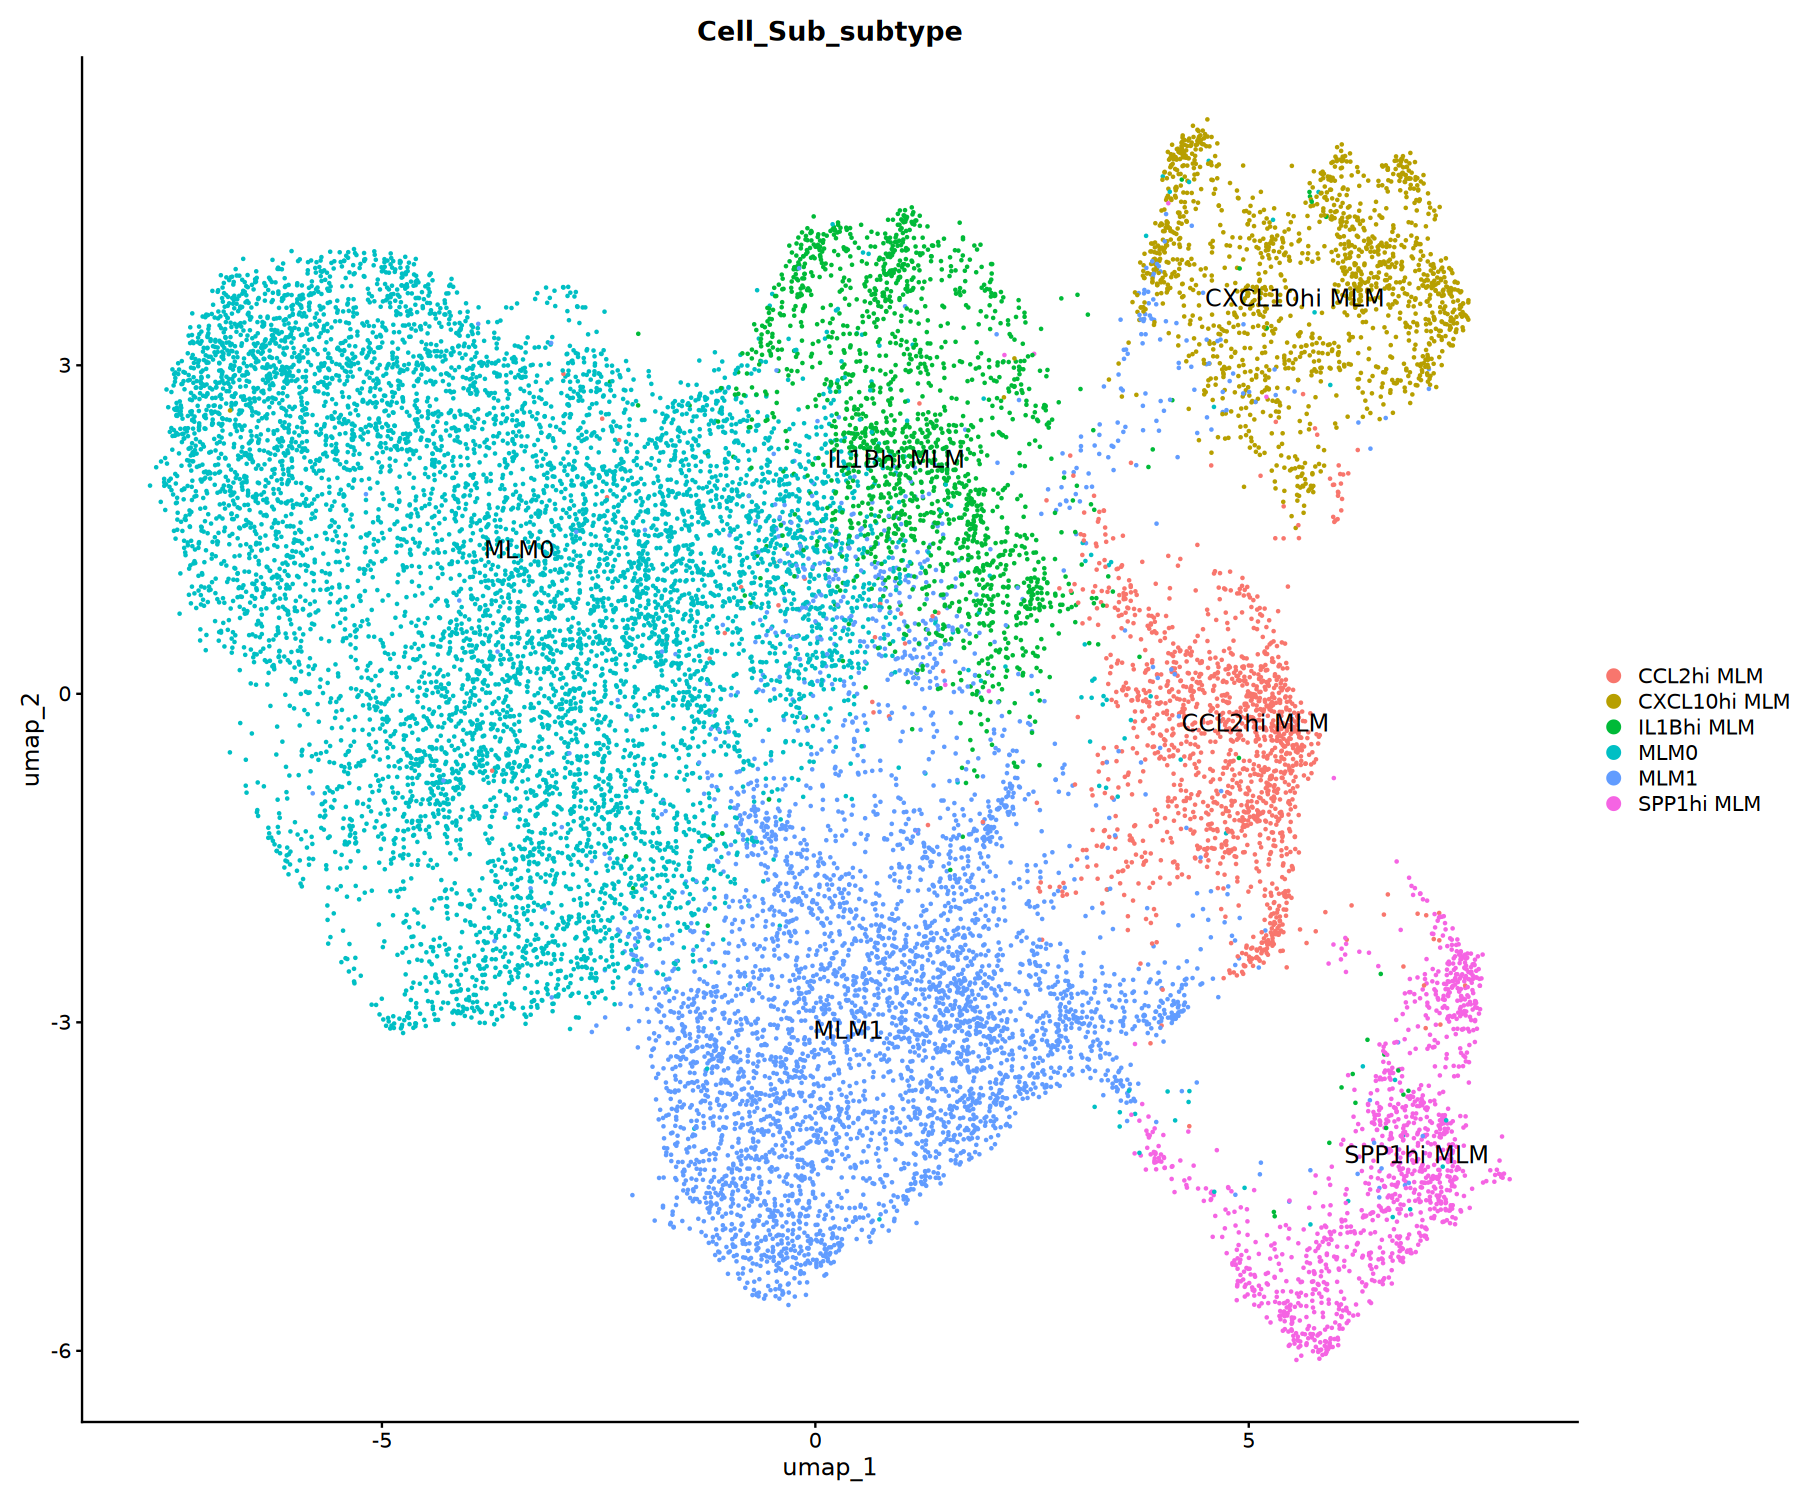

In [3]:
# Subset out monocyte-like macrophages and plot in UMAP:
mdm <- subset(bal, Cell_Subtype == "Monocyte-like macrophage")
mdm
mdm <- RunPCA(mdm, assay.type = "RNA")
mdm <- FindNeighbors(mdm, dims = 1:30, reduction = "pca")
mdm <- FindClusters(mdm, resolution = 0.2, cluster.name = "mdm_clusters")
mdm <- RunUMAP(mdm, reduction = "pca", dims = 1:30)
options(repr.plot.width = 15, repr.plot.height = 12.5)
a <- DimPlot(mdm, reduction = "umap", group.by = c("Cell_Sub_subtype"))
LabelClusters(plot = a, id = "Cell_Sub_subtype", size = 5)

## Figure 3a: MSigDB Hallmark pathway analysis of MLM subclusters

In [ ]:
# as per FGSEA GESECA tutorial - https://bioconductor.org/packages/release/bioc/vignettes/fgsea/inst/doc/geseca-tutorial.html
# ensure mdm data is normalised via SCTransform - note we used 3000 genes instead of 10000 due to computational limitations
mdm <- SCTransform(mdm, verbose = FALSE, variable.features.n = 3000)

In [ ]:
# reverse PCA
mdm <- RunPCA(mdm, assay = "SCT", verbose = FALSE,
                rev.pca = TRUE, reduction.name = "pca.rev",
              reduction.key="PCR_", npcs = 50)
E <- mdm@reductions$pca.rev@feature.loadings

# select MSigDB Hallmark pathways for analysis - human
pathwaysDF <- msigdbr("human", category = "H")
pathways <- split(pathwaysDF$gene_symbol, pathwaysDF$gs_name)

# run GESECA analysis and display top 10 significant pathways
set.seed(1)
gesecaRes <- geseca(pathways, E, minSize = 5, maxSize = 500, center = FALSE)
head(gesecaRes, 10)

# plot selected pathways of interest
keyPathways <- c("HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION", "HALLMARK_ANGIOGENESIS", "HALLMARK_INFLAMMATORY_RESPONSE", 
                 "HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_HYPOXIA", "HALLMARK_APOPTOSIS", 
                 "HALLMARK_INTERFERON_ALPHA_RESPONSE", "HALLMARK_INTERFERON_GAMMA_RESPONSE", "HALLMARK_IL6_JAK_STAT3_SIGNALING")
    
ps <- plotCoregulationProfileReduction(pathways[keyPathways], mdm,
                                       reduction="umap")
options(repr.plot.width = 20, repr.plot.height = 16)
cowplot::plot_grid(plotlist=ps[1:9], ncol=3)

## Figure 3b: Trajectory analysis of MLM subclusters demonstrating two differential trajectories.
Senescence scoring via SenMayo gene set analysis confirming trajectory directionality. 
Genes upregulated along each trajectory with progressing pseudotime portrayed via heatmaps. 

In [ ]:
# as per slingshot vignette 

# Find variable features for dimensionality reduction
# This identifies the most informative genes to use in downstream analysis
mdm <- FindVariableFeatures(mdm, nfeatures = 3000)

# Extract the UMAP coordinates for each cell
dimred <- mdm@reductions$umap@cell.embeddings

# Get the cell type classifications for each cell
clustering <- mdm$Cell_Sub_subtype

# Extract count data for the variable features
# The raw counts for the most informative genes are used in trajectory calculations
counts <- as.matrix(mdm@assays$RNA$counts[mdm@assays$SCT@var.features, ])

set.seed(1)

# Identify lineage trajectories using Slingshot
# Specifying "MLM0" as the starting cluster, as it represents the initial monocyte-like state
lineages <- getLineages(data = dimred, clusterLabels = clustering, start.clus = "MLM0")

pal <- c(
    "MLM0" = "#A6CEE3",        # Light blue - Monocyte-like macrophages type 0
    "MLM1" = "#1F78B4",         # Dark blue - Monocyte-like macrophages type 1
    "IL1Bhi MLM" = "#B2DF8A",   # Light green - Inflammatory IL1B-high MLMs
    "CXCL10hi MLM" = "#33A02C", # Dark green - Interferon-responsive CXCL10-high MLMs
    "CCL2hi MLM" = "#FB9A99",   # Pink - Chemokine-producing CCL2-high MLMs
    "SPP1hi MLM" = "#0CA7E8"    # Bright blue - Tissue-remodeling SPP1-high MLMs
)

# Convert lineages to smooth curves
crv1 <- getCurves(lineages)

# Visualize the trajectory analysis results
# Plots cells in UMAP space colored by subtype, with trajectory paths overlaid
plot(dimred[, 1:2], col = pal[clustering], cex = 0.6, pch = 16)

# Add a legend identifying each macrophage subtype
legend("bottomleft", legend = names(pal), col = pal, pch = 20, cex = 1, pt.cex = 2, text.width = 2)

# Draw the trajectory paths as black lines connecting the macrophage subtypes
# These represent the inferred developmental progression between subtypes
lines(SlingshotDataSet(crv1), lwd = 3, col = "black")

In [ ]:
# plot senescence scoring on mlms - using SenMayo gene set and module scoring
senmayo <- c("ACVR1B", "ANG", "ANGPT1", "ANGPTL4", "AREG", "AXL", "BEX3", "BMP2", "BMP6", "C3", "CCL1", "CCL13", "CCL16", "CCL2", "CCL20", "CCL24", "CCL26", "CCL3", "CCL3L1", "CCL4", "CCL5", "CCL7", "CCL8", "CD55", "CD9", "CSF1", "CSF2", "CSF2RB", "CST4", "CTNNB1", "CTSB", "CXCL1", "CXCL10", "CXCL12", "CXCL16", "CXCL2", "CXCL3", "CXCL8", "CXCR2", "DKK1", "EDN1", "EGF", "EGFR", "EREG", "ESM1", "ETS2", "FAS", "FGF1", "FGF2", "FGF7", "GDF15", "GEM", "GMFG", "HGF", "HMGB1", "ICAM1", "ICAM3", "IGF1", "IGFBP1", "IGFBP2", "IGFBP3", "IGFBP4", "IGFBP5", "IGFBP6", "IGFBP7", "IL10", "IL13", "IL15", "IL18", "IL1A", "IL1B", "IL2", "IL32", "IL6", "IL6ST", "IL7", "INHA", "IQGAP2", "ITGA2", "ITPKA", "JUN", "KITLG", "LCP1", "MIF", "MMP1", "MMP10", "MMP12", "MMP13", "MMP14", "MMP2", "MMP3", "MMP9", "NAP1L4", "NRG1", "PAPPA", "PECAM1", "PGF", "PIGF", "PLAT", "PLAU", "PLAUR", "PTBP1", "PTGER2", "PTGES", "RPS6KA5", "SCAMP4", "SELPLG", "SEMA3F", "SERPINB4", "SERPINE1", "SERPINE2", "SPP1", "SPX", "TIMP2", "TNF", "TNFRSF10C", "TNFRSF11B", "TNFRSF1A", "TNFRSF1B", "TUBGCP2", "VEGFA", "VEGFC", "VGF", "WNT16", "WNT2")
mdm <- AddModuleScore(mdm, features = list(senmayo), name = "Senescence_Score")

# rescale module score for easy plotting and visualisation
mdm$Senescence_Score_rescaled <- rescale(mdm$Senescence_Score1, to = c(0, 5))
FeaturePlot(mdm, features = "Senescence_Score_rescaled", cols = c("#7fb3d5", "grey", "#a93226"))

In [ ]:
# visualise genes upregulated along slingshot trajectory
# run a small test with fitGAM to get significant genes
# select a subset of genes for testing - ensure they exist in counts
all_genes <- rownames(counts)
test_genes <- head(all_genes, 200)
print(paste0("Number of test genes: ", length(test_genes)))
test_counts <- counts[test_genes,]

gc()

# run fitGAM on test set
GAM_test <- tradeSeq::fitGAM(counts = test_counts,
                            sds = crv1,  # Your existing curve object
                            nknots = 3,
                            verbose = TRUE,
                            parallel = FALSE)

# run association test on test genes
AT_test <- associationTest(GAM_test)

# get significant genes from test run
sig_genes_filtered <- rownames(AT_test)[AT_test$pvalue < 0.05]
print(paste0("Number of significant genes found: ", length(sig_genes_filtered)))

# verify all significant genes are in the counts matrix
sig_genes_in_counts <- intersect(sig_genes_filtered, rownames(counts))
print(paste0("Number of significant genes in counts matrix: ", length(sig_genes_in_counts)))

# create binned expression matrix for a trajectory
create_trajectory_heatmap <- function(pseudotime, counts_data, genes, n_bins=50, n_top_genes=30) {
    # ensure genes exist in counts_data
    valid_genes <- intersect(genes, rownames(counts_data))
    print(paste0("Number of valid genes for heatmap: ", length(valid_genes)))
    
    if(length(valid_genes) == 0) {
        stop("No valid genes found for heatmap")
    }
    
    # get valid cells for this trajectory
    valid_cells <- !is.na(pseudotime)
    pt_clean <- pseudotime[valid_cells]
    
    # get expression data
    sig_counts <- counts_data[valid_genes, ]
    log_counts <- log1p(sig_counts)
    scaled_counts <- t(scale(t(log_counts)))
    
    # create bins
    bin_breaks <- seq(min(pt_clean), max(pt_clean), length.out = n_bins + 1)
    pt_bins <- cut(pt_clean, breaks = bin_breaks, labels = FALSE)
    
    # calculate binned expression
    binned_expression <- matrix(0, nrow = nrow(scaled_counts), ncol = n_bins)
    rownames(binned_expression) <- rownames(scaled_counts)
    
    for(i in 1:n_bins) {
        bin_cells <- which(pt_bins == i)
        if(length(bin_cells) > 0) {
            valid_expr <- scaled_counts[, valid_cells][, bin_cells, drop = FALSE]
            binned_expression[,i] <- rowMeans(valid_expr)
        }
    }
    
    # calculate variance and get top genes
    gene_vars <- apply(binned_expression, 1, var)
    n_top_to_use <- min(n_top_genes, length(gene_vars))
    top_var_genes <- names(sort(gene_vars, decreasing = TRUE)[1:n_top_to_use])
    
    # final expression matrix
    final_expression <- binned_expression[top_var_genes, ]
    final_expression[final_expression > 2.5] <- 2.5
    final_expression[final_expression < -2.5] <- -2.5
    
    return(final_expression)
}

# get pseudotime values for both trajectories from previous curves object
pt1 <- slingPseudotime(crv1)[,1]
pt2 <- slingPseudotime(crv1)[,2]

# create heatmaps for both trajectories
expr1 <- create_trajectory_heatmap(pt1, counts, sig_genes_in_counts)
expr2 <- create_trajectory_heatmap(pt2, counts, sig_genes_in_counts)

# order genes visually by pseudotime upregulation
traj1_full_order <- c(
    "RRM2", "SPP1", "C15orf48", "CCL3", "FTL", "FTH1", "TIMP3",
    "MMP9", "CHIT1", "CHI3L1", "MMP7", "CCL22", "CCL2", "CCL7",
    "CCL13", "RNASE1", "LGMN", "MARCKS", "F13A1", "HLA-DRA",
    "PPBP", "FCN1", "VCAN", "APOE", "APOC1", "LINC03051", "LSAMP",
    "TALAM1", "FN1", "HLA-DRB5"
)

traj2_full_order <- c(
    "CXCL10", "CXCL11", "MT2A", "IFI27", "CXCL9", "IFITM1",
    "MARCKS", "C15orf48", "IL32", "CCL8", "CCL4", "CCL4L2",
    "CCL3", "HLA-DRA", "LYZ", "FTH1", "FTL", "LSAMP", "FABP4",
    "APOC1", "CCL18", "LINC-PINT", "TALAM1", "CD69", "CCSER1",
    "CXCL8", "IL1B", "EREG", "VCAN", "PID1"
)

# extract matrices in the correct order
expr1_ordered <- expr1[match(traj1_full_order, rownames(expr1)),]
expr2_ordered <- expr2[match(traj2_full_order, rownames(expr2)),]

# heatmap for trajectory 1 with specified order
ht1 <- Heatmap(expr1_ordered,
        name = "Z-score",
        cluster_rows = FALSE,  # No clustering since we specified the order
        cluster_columns = FALSE,
        show_column_names = FALSE,
        show_row_names = TRUE,
        col = colorRamp2(c(-2.5, 0, 2.5), 
                        c("blue", "white", "red")),
        column_title = "Trajectory 1 Pseudotime",
        row_title = "Top 30 Variable Genes",
        use_raster = TRUE)

# heatmap for trajectory 2 with specified order
ht2 <- Heatmap(expr2_ordered,
        name = "Z-score",
        cluster_rows = FALSE,  # No clustering since we specified the order
        cluster_columns = FALSE,
        show_column_names = FALSE,
        show_row_names = TRUE,
        col = colorRamp2(c(-2.5, 0, 2.5), 
                        c("blue", "white", "red")),
        column_title = "Trajectory 2 Pseudotime",
        row_title = "Top 30 Variable Genes",
        use_raster = TRUE)

# draw the heatmaps - NOTE THAT FOR PUBLICATION PURPOSES, the naming for Trajectory 1 and Trajectory 2 have been switched
# below heatmaps represent the trajectory naming within the manuscript publication
print("Trajectory 1 Heatmap:")
draw(ht2)

print("Trajectory 2 Heatmap:")
draw(ht1)

## Figure 3c: Cell type proportion analysis of each MLM subcluster (out of all MLMs) in each ILD subtype

In [9]:
head(mdm)

,Sample,Pool,Doublet,Barcode,disease_final,sex,age_at_sampling,telomere_length,smoking_0_ex1_current2,10X_chemistry,⋯,pct_counts_mt,pct_counts_ribo,new_clusters,Compartment,Cell_Type,Cell_Subtype,IPF,Cell_Sub_subtype,mdm_clusters,seurat_clusters
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>
AAACCCAAGCTTAAGA-1-B5_RZ725-SR-ILD,B5_RZ725,RZ725_Pool4,singlet,AAACCCAAGCTTAAGA-1,SR-ILD,male,42,>10thcentile,2,v3,⋯,4.038835,5.8640776,6,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCAAGGCGACAT-1-B2_RZ725-Silicosis,B2_RZ725,RZ725_Pool4,singlet,AAACCCAAGGCGACAT-1,Silicosis,male,23,<10thcentile,2,v3,⋯,9.972836,1.2029492,6,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCAAGTACAGCG-1-B6_RZ725-Silicosis,B6_RZ725,RZ725_Pool4,singlet,AAACCCAAGTACAGCG-1,Silicosis,male,24,<10thcentile,1,v3,⋯,5.708848,0.4757374,11,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCAGTTCCACAA-1-B6_RZ725-Silicosis,B6_RZ725,RZ725_Pool4,singlet,AAACCCAGTTCCACAA-1,Silicosis,male,24,<10thcentile,1,v3,⋯,4.004055,0.3041054,14,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCATCCTACGAA-1-B5_RZ725-SR-ILD,B5_RZ725,RZ725_Pool4,singlet,AAACCCATCCTACGAA-1,SR-ILD,male,42,>10thcentile,2,v3,⋯,7.884616,2.0104895,11,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCATCGACCATA-1-B5_RZ725-SR-ILD,B5_RZ725,RZ725_Pool4,singlet,AAACCCATCGACCATA-1,SR-ILD,male,42,>10thcentile,2,v3,⋯,1.647447,2.7594728,23,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,CCL2hi MLM,4,4
AAACCCATCGCTTTAT-1-B6_RZ725-Silicosis,B6_RZ725,RZ725_Pool4,singlet,AAACCCATCGCTTTAT-1,Silicosis,male,24,<10thcentile,1,v3,⋯,3.117753,5.6944089,11,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCATCGGTGAAG-1-B5_RZ725-SR-ILD,B5_RZ725,RZ725_Pool4,singlet,AAACCCATCGGTGAAG-1,SR-ILD,male,42,>10thcentile,2,v3,⋯,2.317881,4.3874168,6,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM0,0,0
AAACCCATCTCGTTTA-1-B2_RZ725-Silicosis,B2_RZ725,RZ725_Pool4,singlet,AAACCCATCTCGTTTA-1,Silicosis,male,23,<10thcentile,2,v3,⋯,2.319661,5.1768036,6,Myeloid,Macrophage,Monocyte-like macrophage,Non-IPF,MLM1,1,1


In [15]:
# Cell type proportions of different mlm subsets
# Obtaining proportions via propeller to generate cell type proportion graphs
props <- getTransformedProps(mdm$Cell_Sub_subtype, mdm$Sample, transform="logit")
x <- as.data.frame(props$Proportions)

# add mapping of disease to sample
sample_disease_map <- unique(mdm@meta.data[, c("Sample", "disease_final")])
disease_lookup <- setNames(as.character(sample_disease_map$disease_final), 
                          as.character(sample_disease_map$Sample))
x$disease_final <- disease_lookup[as.character(x$sample)]

head(x)

Performing logit transformation of proportions



,clusters,sample,Freq,disease_final
,<fct>,<fct>,<dbl>,<chr>
1,CCL2hi MLM,B1_RZ725,0.06694561,HP
2,CXCL10hi MLM,B1_RZ725,0.66527197,HP
3,IL1Bhi MLM,B1_RZ725,0.01255230,HP
4,MLM0,B1_RZ725,0.05020921,HP
5,MLM1,B1_RZ725,0.17991632,HP
6,SPP1hi MLM,B1_RZ725,0.02510460,HP


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


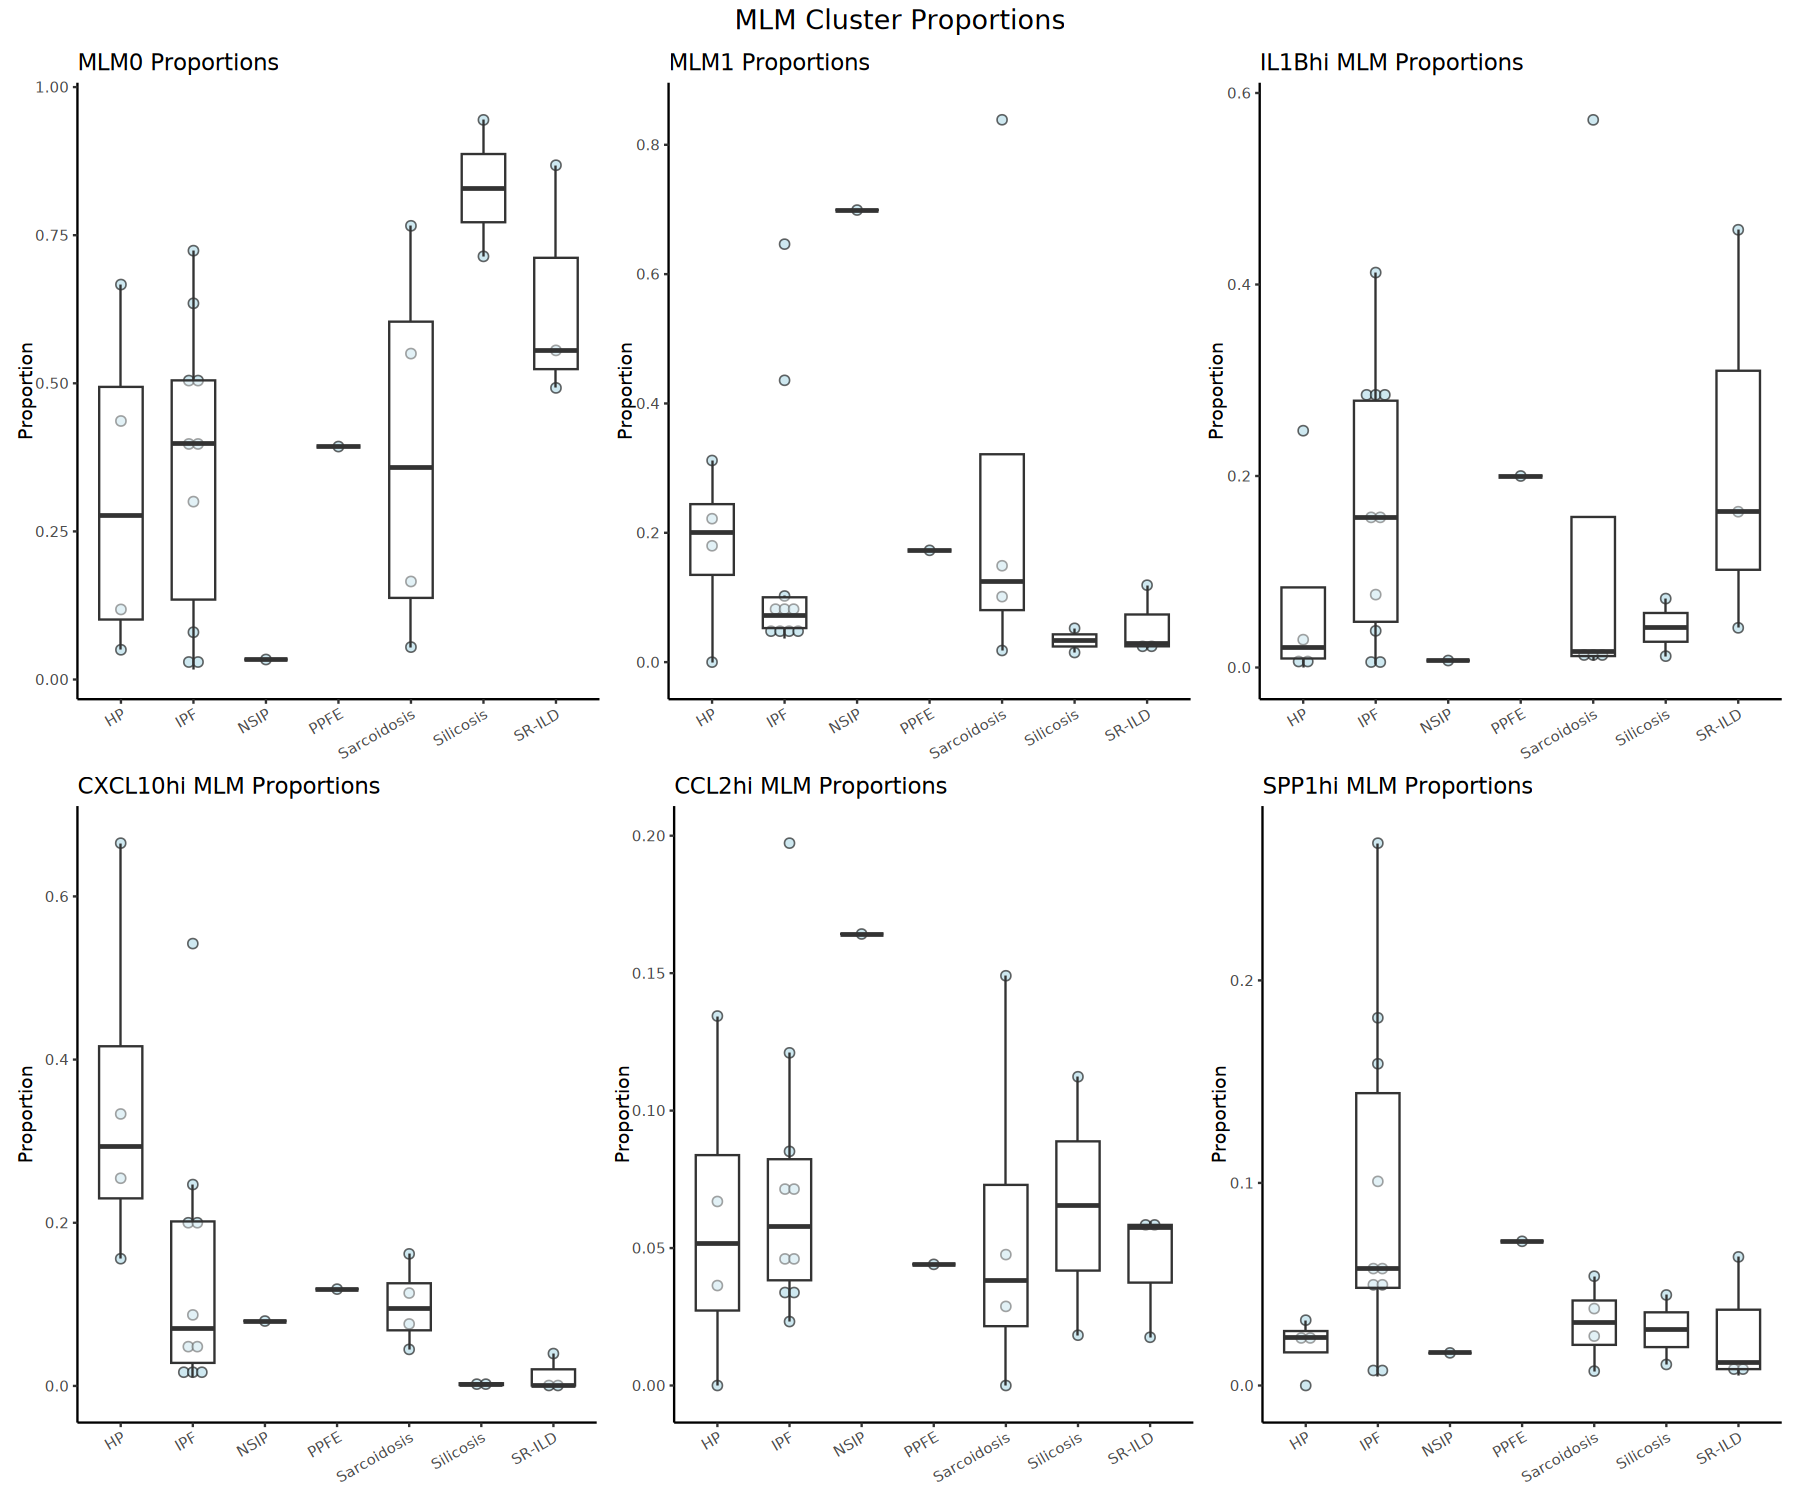

In [17]:
# define the cluster names
cluster_names <- c("MLM0", "MLM1", "IL1Bhi MLM", "CXCL10hi MLM", "CCL2hi MLM", "SPP1hi MLM")

# create a list to store each cluster's data
cluster_data <- list()

# loop through cluster names and create subsets
for (i in 1:length(cluster_names)) {
  cluster_name <- cluster_names[i]
  # Subset the data and store in the list with a simple index name
  cluster_data[[i]] <- subset(x, x$clusters == cluster_name)
  # Assign the variable name for backward compatibility if needed
  assign(paste0("cluster", i-1), cluster_data[[i]])
}

# define a function for consistent plotting
create_boxplot_with_dots <- function(data, title) {
  data %>%
    ggplot(aes(x = disease_final, y = Freq)) + 
    # Add individual data points first (in background)
    geom_dotplot(binaxis = "y", stackdir = "center", 
                 dotsize = 0.5, alpha = 0.6, fill = "lightblue") +
    # Add boxplot on top
    geom_boxplot(alpha = 0.4, width = 0.6, outlier.shape = NA) + 
    theme_classic() +
    ylab("Proportion") +
    labs(title = title) + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    xlab(NULL)
}

# initialize a list to store plots
plots <- list()

# loop through clusters to create plots
for (i in 1:length(cluster_names)) {
  # Create plot using the subset data (cluster0, cluster1, etc.)
  plots[[i]] <- create_boxplot_with_dots(
    cluster_data[[i]], 
    paste(cluster_names[i], "Proportions")
  )
}

# create the layout for a 2x3 grid
combined_plot <- (plots[[1]] + plots[[2]] + plots[[3]]) / 
                 (plots[[4]] + plots[[5]] + plots[[6]])
combined_plot <- combined_plot + 
  plot_annotation(title = "MLM Cluster Proportions",
                  theme = theme(plot.title = element_text(size = 16, hjust = 0.5)))

combined_plot

## Figure 3d: Differential expression of selected fibrotic genes in the SPP1hi MLM subcluster of non-IPF and IPF monocyte-like macrophages

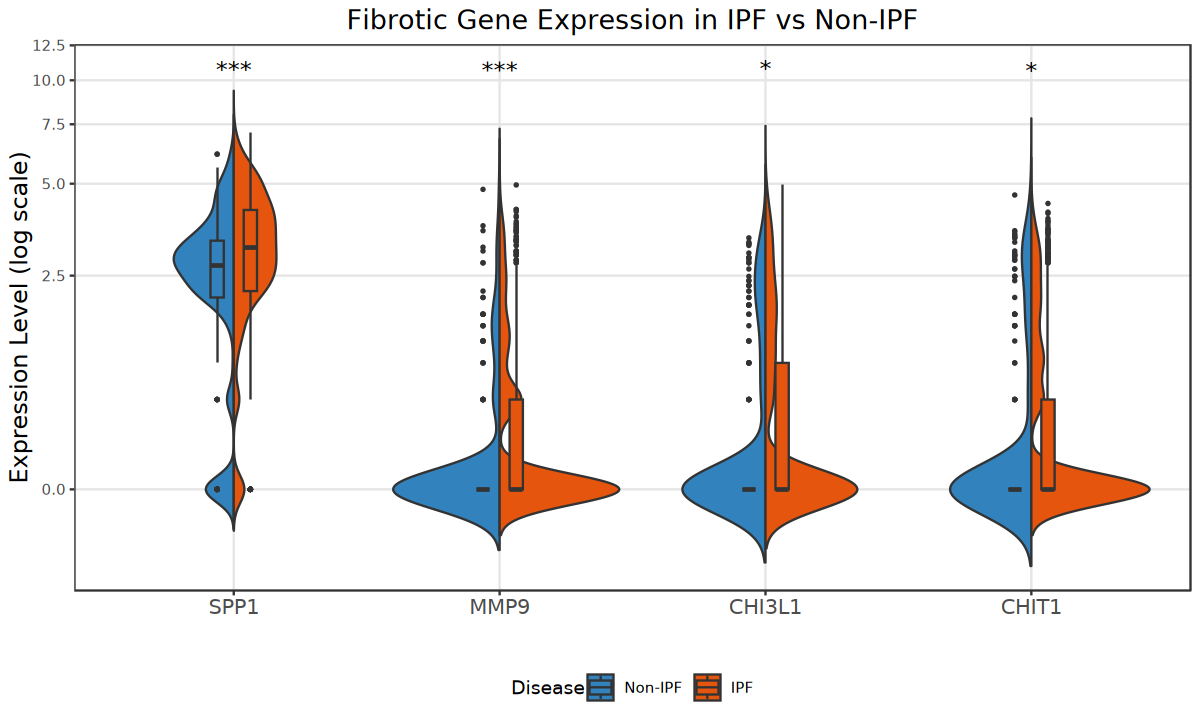

In [19]:
# subset out SPP1hi MLMs only
macs <- subset(bal, Cell_Sub_subtype == "SPP1hi MLM")

# generate split violin plot using GeomSplitViolin
GeomSplitViolin <- ggproto("GeomSplitViolin", GeomViolin, 
                           draw_group = function(self, data, ..., draw_quantiles = NULL) {
  data <- transform(data, xminv = x - violinwidth * (x - xmin), xmaxv = x + violinwidth * (xmax - x))
  grp <- data[1, "group"]
  newdata <- plyr::arrange(transform(data, x = if (grp %% 2 == 1) xminv else xmaxv), if (grp %% 2 == 1) y else -y)
  newdata <- rbind(newdata[1, ], newdata, newdata[nrow(newdata), ], newdata[1, ])
  newdata[c(1, nrow(newdata) - 1, nrow(newdata)), "x"] <- round(newdata[1, "x"])
  if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {
    stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <=
      1))
    quantiles <- ggplot2:::create_quantile_segment_frame(data, draw_quantiles)
    aesthetics <- data[rep(1, nrow(quantiles)), setdiff(names(data), c("x", "y")), drop = FALSE]
    aesthetics$alpha <- rep(1, nrow(quantiles))
    both <- cbind(quantiles, aesthetics)
    quantile_grob <- GeomPath$draw_panel(both, ...)
    ggplot2:::ggname("geom_split_violin", grid::grobTree(GeomPolygon$draw_panel(newdata, ...), quantile_grob))
  }
  else {
    ggplot2:::ggname("geom_split_violin", GeomPolygon$draw_panel(newdata, ...))
  }
})

geom_split_violin <- function(mapping = NULL, data = NULL, stat = "ydensity", position = "identity", ..., 
                              draw_quantiles = NULL, trim = TRUE, scale = "area", na.rm = FALSE, 
                              show.legend = NA, inherit.aes = TRUE) {
  layer(data = data, mapping = mapping, stat = stat, geom = GeomSplitViolin, 
        position = position, show.legend = show.legend, inherit.aes = inherit.aes, 
        params = list(trim = trim, scale = scale, draw_quantiles = draw_quantiles, na.rm = na.rm, ...))
}

# extract the data for genes of interest in the specified order
genes_of_interest <- c("SPP1", "MMP9", "CHI3L1", "CHIT1")
expression_data <- FetchData(macs, vars = genes_of_interest, slot = "data")

# get the IPF status
ipf_status <- macs@meta.data$IPF
expression_data$IPF <- factor(ipf_status, levels = c("Non-IPF", "IPF"))

# remove any NA values if present
expression_data <- expression_data %>% filter(!is.na(IPF))

# reshape to long format
expression_long <- expression_data %>%
  pivot_longer(cols = all_of(genes_of_interest),
               names_to = "Gene",
               values_to = "Expression")

# ensure genes are ordered correctly
expression_long$Gene <- factor(expression_long$Gene, levels = genes_of_interest)

# create group variable
expression_long$group <- as.numeric(interaction(expression_long$Gene, expression_long$IPF, drop = FALSE))

# calculate p-values for each gene
p_values <- data.frame(Gene = character(), p_value = numeric(), sig_symbol = character(), stringsAsFactors = FALSE)

for (gene in genes_of_interest) {
  # Subset data for the current gene
  gene_data <- expression_long %>% filter(Gene == gene)
  
  # Extract expression values for each group
  ipf_expr <- gene_data %>% filter(IPF == "IPF") %>% pull(Expression)
  nonipf_expr <- gene_data %>% filter(IPF == "Non-IPF") %>% pull(Expression)
  
  # Perform Wilcoxon test
  test_result <- wilcox.test(ipf_expr, nonipf_expr, exact = FALSE)
  
  # Get p-value and determine significance symbol
  p_val <- test_result$p.value
  
  if (p_val < 0.001) {
    symbol <- "***"
  } else if (p_val < 0.01) {
    symbol <- "**"
  } else if (p_val < 0.05) {
    symbol <- "*"
  } else {
    symbol <- "ns"
  }
  
  # Add to results dataframe
  p_values <- rbind(p_values, data.frame(
    Gene = gene,
    p_value = p_val,
    sig_symbol = symbol
  ))
}

# add asterisk annotation to plot to indicate p value - place at top of plot above highest gene expression
annotations <- data.frame(
  Gene = factor(p_values$Gene, levels = genes_of_interest),
  p_value = p_values$p_value,
  sig_symbol = p_values$sig_symbol,
  y_pos = numeric(length(p_values$Gene)),
  stringsAsFactors = FALSE
)

# Calculate max expression for each gene with custom height multipliers
for (i in 1:nrow(annotations)) {
  gene_name <- as.character(annotations$Gene[i])
  max_expr <- max(expression_long$Expression[expression_long$Gene == gene_name], na.rm = TRUE)
  
  # Use different multipliers for different genes
  if (gene_name == "SPP1") {
    multiplier <- 1.5  # Keep the same as before for SPP1
  } else if (gene_name == "MMP9") {
    multiplier <- 2.15  # Higher for MMP9
  } else if (gene_name == "CHI3L1") {
    multiplier <- 2.17  # Even higher for CHI3L1
  } else if (gene_name == "CHIT1") {
    multiplier <- 2.3  # Even higher for CHIT1
  }
  
  annotations$y_pos[i] <- max_expr * multiplier
}

# Create the plot
p <- ggplot(expression_long, aes(x = Gene, y = Expression, fill = IPF)) + 
  geom_split_violin(trim = FALSE) + 
  geom_boxplot(width = 0.1, position = position_dodge(0.25), outlier.size = 0.5) + 
  # Add significance annotations
  geom_text(data = annotations, 
            aes(x = Gene, y = y_pos, label = sig_symbol),
            inherit.aes = FALSE,
            size = 5) + 
  scale_y_continuous(trans = "log1p") + 
  scale_fill_manual(
    values = c("Non-IPF" = "#3182BD", "IPF" = "#E6550D"),
    drop = FALSE
  ) + 
  theme_bw() + 
  theme(
    legend.position = "bottom",
    axis.text.x = element_text(angle = 0, hjust = 0.5, size = 12),
    axis.title = element_text(size = 14),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    plot.title = element_text(hjust = 0.5, size = 16)
  ) + 
  labs(
    title = "Fibrotic Gene Expression in IPF vs Non-IPF",
    x = "",
    y = "Expression Level (log scale)",
    fill = "Disease"
  )

options(repr.plot.width = 10, repr.plot.height = 6)
print(p)